In [3]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import catboost as cb
import os
import warnings

# Import custom functions (dependencies from previous tasks)
from my_pyt_lms import my_pyt_lms
from rytov_vs_latency import rytov_vs_latency

warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION PARAMETERS
# ============================================================================

# Data parameters

datapath = r'C:\Users\wanzay\OneDrive - Universidade de Aveiro\Desktop\Course module Materials\Marco NN\NN-FSO\NN-FSO REP\ML_Channel_Estimation\data'
DATA_DIR = datapath #'./data/'
DATASET_FILE = 'lin_wan5_mod_turb_samps.mat'  # Options: lin_wan5_mod_turb_samps.mat, 
                                               #          lin_wan5_strong_turb_samps.mat,
                                               #          lin_wan5_weak_turb_samps.mat
DATASET_VAR = 'lin_wan5_m_dat'  # Variable name in .mat file
DATASET_NAME = 'Moderate Turbulence'

# Signal parameters
FS_MEAS = 1e4  # Measurement sampling frequency (10 kHz)
FS = FS_MEAS / 1  # Processing sampling frequency

# Model parameters
LATENCY = 20  # Prediction horizon in samples (can be list: [1, 5, 10, 15, 20, 25, 30, 35, 40, 50])
N_TAPS = 10   # Filter memory length / number of lagged features

# Training parameters
N_TRAIN = 100000  # Number of samples for training
USE_DIFFERENTIAL = True  # Use first-order differencing for stationarity

# Model hyperparameters
RF_N_ESTIMATORS = 100
XGB_N_ESTIMATORS = 100
CB_ITERATIONS = 100

# Visualization
VISUAL_DEBUG = False
OUTPUT_DIR = './output/'

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

# Power/dB conversion functions
pow2db = lambda x: 10 * np.log10(x)
db2pow = lambda x: 10 ** (x / 10)


In [5]:
from fso_ch_est_2 import *

In [6]:
X = load_fso_data(DATA_DIR, DATASET_FILE, DATASET_VAR)

Successfully loaded lin_wan5_mod_turb_samps.mat
Data shape: (600000,)


In [ ]:
plt.plot(X)

In [11]:
wa = pow2db(X) - np.mean(pow2db(X))

In [9]:
latency_values = [LATENCY] if isinstance(LATENCY, int) else LATENCY

In [12]:
for lat in latency_values:
        print(f"\n{'='*80}")
        print(f"[2/5] Processing latency = {lat} samples")
        print(f"{'='*80}")
        
        # ====================================================================
        # CREATE FEATURES
        # ====================================================================
        print("\n[3/5] Creating lagged features...")
        
        df = create_lagged_features(wa, lat, N_TAPS, USE_DIFFERENTIAL)
        
        print(f"Feature matrix shape: {df.shape}")
        print(f"Available samples after lagging: {len(df)}")
        
        # ====================================================================
        # SPLIT DATA
        # ====================================================================
        print("\n[4/5] Splitting into train/test sets...")
        
        n_train = min(N_TRAIN, len(df) - 1000)  # Ensure we have test samples
        df_train = df.iloc[:n_train]
        df_test = df.iloc[n_train:]
        
        print(f"Training set: {len(df_train)} samples")
        print(f"Test set: {len(df_test)} samples")


[2/5] Processing latency = 20 samples

[3/5] Creating lagged features...
Feature matrix shape: (599970, 14)
Available samples after lagging: 599970

[4/5] Splitting into train/test sets...
Training set: 100000 samples
Test set: 499970 samples


In [13]:
 # Define feature columns
latency = lat
n_taps = N_TAPS

feature_columns = [f'OptPow_diff_lag{i}' for i in range(latency, latency + n_taps)]
target_column = f'OptPow_{latency}stepdiff_target'

# Extract features and targets
X_train = df_train[feature_columns].values
y_train = df_train[target_column].values
X_test = df_test[feature_columns].values
y_test = df_test[target_column].values

In [14]:
weights = None
lock_coeff = False

y_tr, err_tr, wts_tr = my_pyt_lms(X_train, y_train, latency, n_taps, weights, lock_coeff)

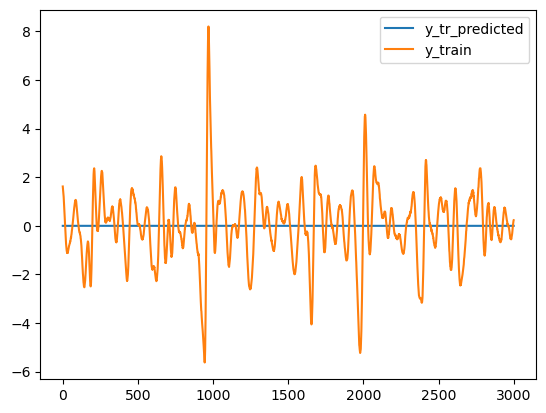

In [24]:
endIdx = 3000
plt.plot(y_tr[:endIdx],label= 'y_tr_predicted')
plt.plot(y_train[:endIdx],label= 'y_train')
# plt.plot(X_train[:endIdx],label= 'X_train')
plt.legend()

In [25]:
w

NameError: name 'w' is not defined

In [26]:
L

NameError: name 'L' is not defined

In [27]:
print(L)

NameError: name 'L' is not defined

In [28]:
plt.figure(),plt.plot(predictions_lms,label='org scale pred'),plt.plot(yt,label='yt'),plt.legend(),plt.show()

NameError: name 'predictions_lms' is not defined

<Figure size 640x480 with 0 Axes>